## Covid-19 Controlling Practices in Different Countries

#### Objective 1: To study the impact and spread of Covid-19 using clustering method
#### Objective 2: To analyze the effectiveness of pandemic controlling practices in different countries

In [1]:
# Import necessary library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

std=StandardScaler()

In [2]:
# Read file from the directory
covid=pd.read_csv("C:/Users/willy/Desktop/Education/Master - Data Science (UM)/Sem2/WQD7006_Machine_Learning/Assignment/covid_19_clean_complete.csv")
covid

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [4]:
#Data checking step to identify any missing value or wrong format
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (49068, 10)
Checking for null values:
 Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64
Checking Data-type of each column:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object


In [5]:
#Dropping columns Lat and Long, and Province/State due to too many missing values
covid.drop(["Province/State","Lat","Long"],1,inplace=True)

In [6]:
#Converting "Date" into Datetime format
covid["Date"]=pd.to_datetime(covid["Date"])

In [7]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["Date"]==covid["Date"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100
countrywise

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
US,4290259,1325804,148011,3.449932,30.902656
Brazil,2442375,1846641,87618,3.587410,75.608414
India,1480073,951166,33408,2.257186,64.264803
Russia,816680,602249,13334,1.632708,73.743572
South Africa,452529,274925,7067,1.561668,60.753013
Mexico,395489,303810,44022,11.131030,76.818824
Peru,389717,272547,18418,4.725993,69.934594
Chile,347923,319954,9187,2.640527,91.961152
United Kingdom,301708,1437,45844,15.194824,0.476288


Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

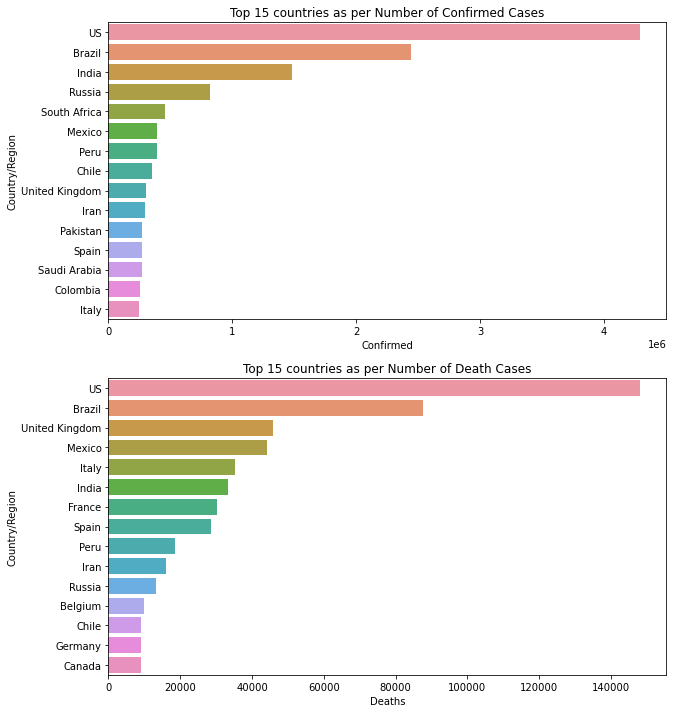

In [28]:
# To identify top 15 Countries with Highest Number of Confirmed and Deaths Cases 
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

### Top 15 Countries as per Mortatlity Rate and Recovery Rate with more than 500 Confirmed Cases

Text(0.5, 0, 'Recovery (in Percentage)')

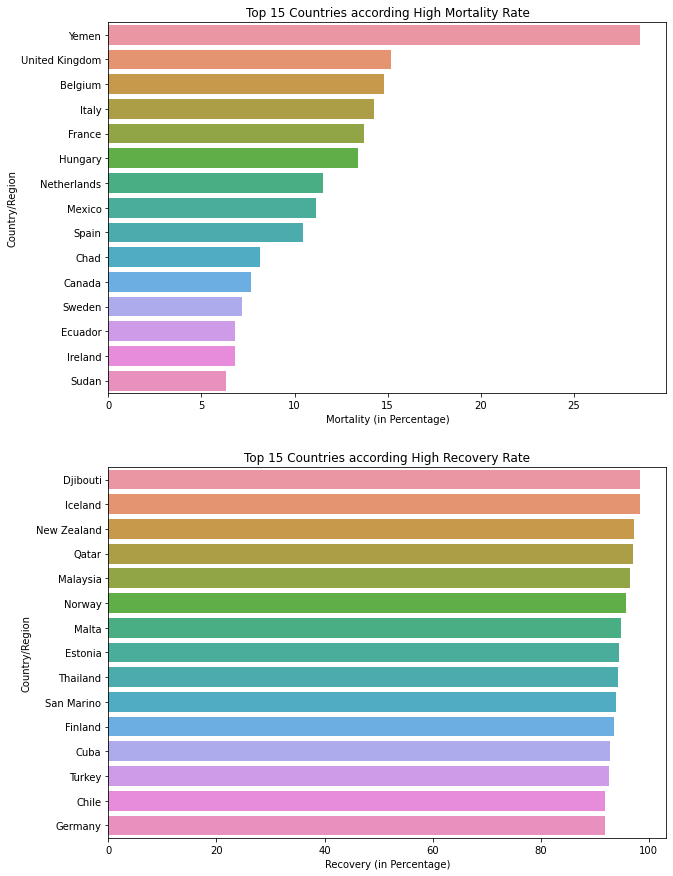

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortality Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 0, 'Recovery (in Percentage)')

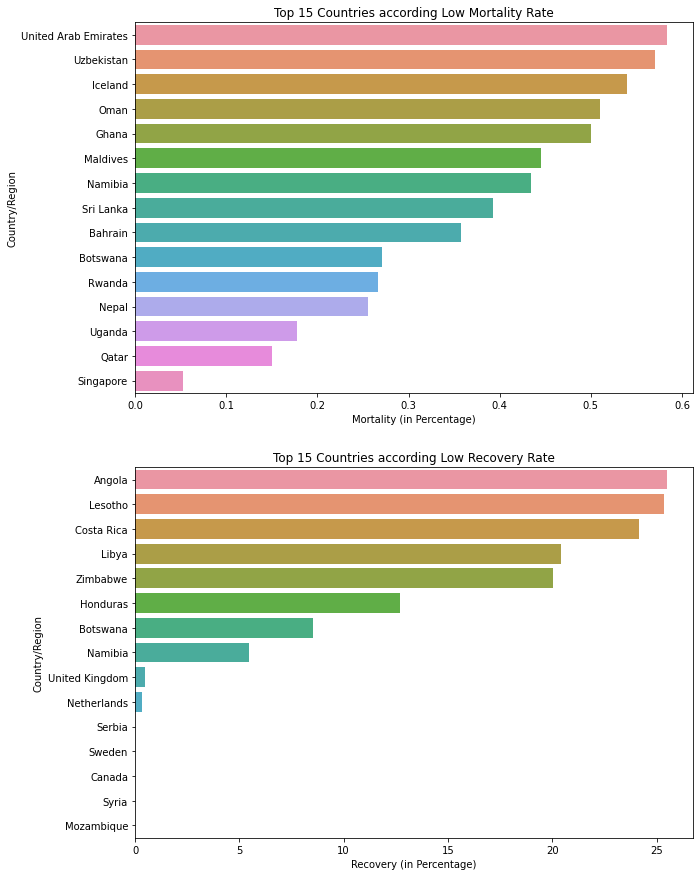

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according Low Mortality Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

### Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate

In [15]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths=no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False).drop(["Mortality"],1)
no_deaths.style.background_gradient(cmap="Reds")

,Confirmed,Recovered,Deaths,Recovery
Country/Region,,,,
Vietnam,431,365,0,84.6868
Mongolia,289,222,0,76.8166
Eritrea,265,191,0,72.0755
Cambodia,226,147,0,65.0442
Seychelles,114,39,0,34.2105


In [42]:
# Vietnam has able to contain COVID-19 pretty well with no Deaths recorded so far with pretty healthy Recovery Rate. 
# All the above countries are showing amazing recovery rate.

Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

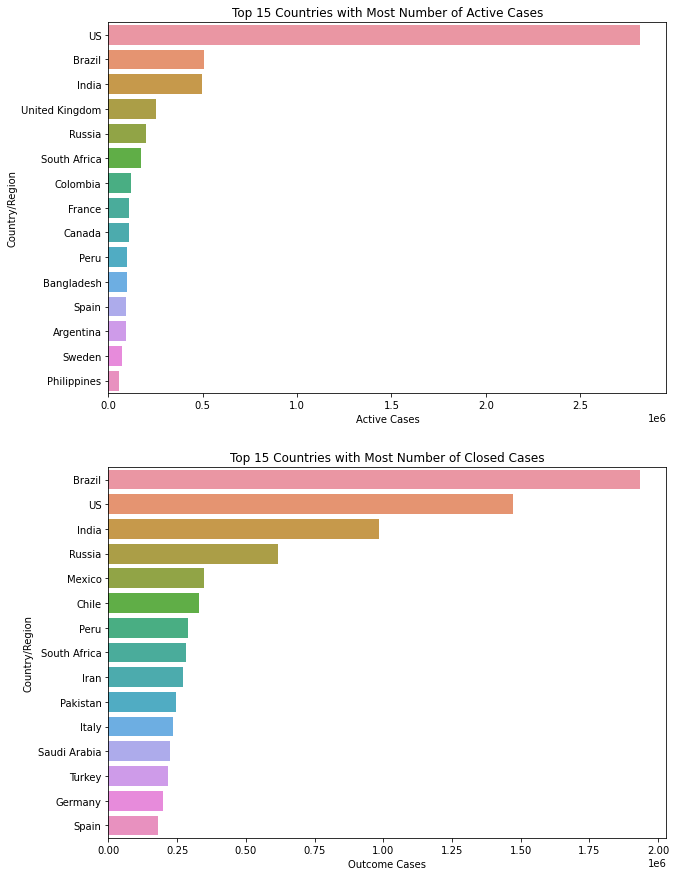

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

Text(0.5, 1.0, 'Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases')

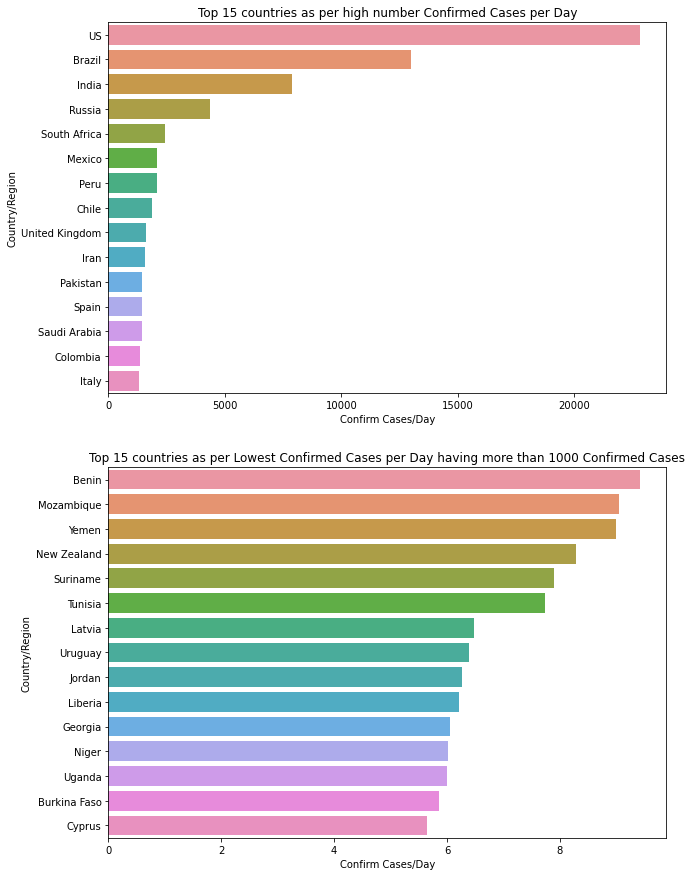

In [50]:
country_date=covid.groupby(["Country/Region","Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate=[]
for country in countrywise.index:
    days=country_date.loc[country].shape[0]
    confirm_rate.append((countrywise.loc[country]["Confirmed"])/days)
countrywise["Confirm Cases/Day"]=confirm_rate

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
top_15_ccpd=countrywise.sort_values(["Confirm Cases/Day"],ascending=False).head(15)
sns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Confirm Cases/Day"],ax=ax1)
ax1.set_title("Top 15 countries as per high number Confirmed Cases per Day")
bottom_15_ccpd=countrywise[countrywise["Confirmed"]>1000].sort_values(["Confirm Cases/Day"],ascending=False).tail(15)
sns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Confirm Cases/Day"],ax=ax2)
ax2.set_title("Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases")

### Clustering of Countries

In [17]:
# The clustering of countries can be done considering different features. 
# Here I'm trying to cluster different countries based on the Mortality and Recovery rate of individual country.
# As we all are well aware that COVID-19 has different Mortality Rate among different countries based on 
# different factors and so is the Recovery Rate because of pandemic controlling practices followed by the individual country. 
# Also Mortality Rate and Recovery Rate both togther takes into account all types of cases Confirmed, Recoverd and Deaths.


In [18]:
X=countrywise[["Mortality","Recovery"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X) 

In [19]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    #sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Elbow Method')

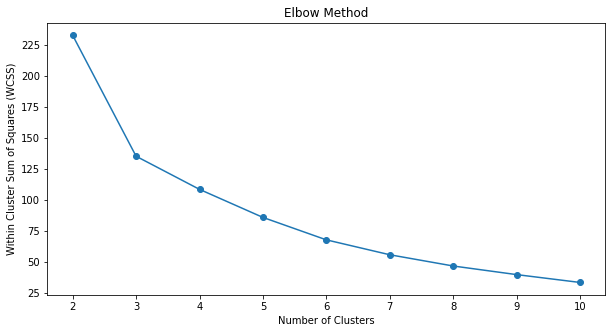

In [20]:
x=np.arange(2,11)
plt.figure(figsize=(10,5))
plt.plot(x,wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")

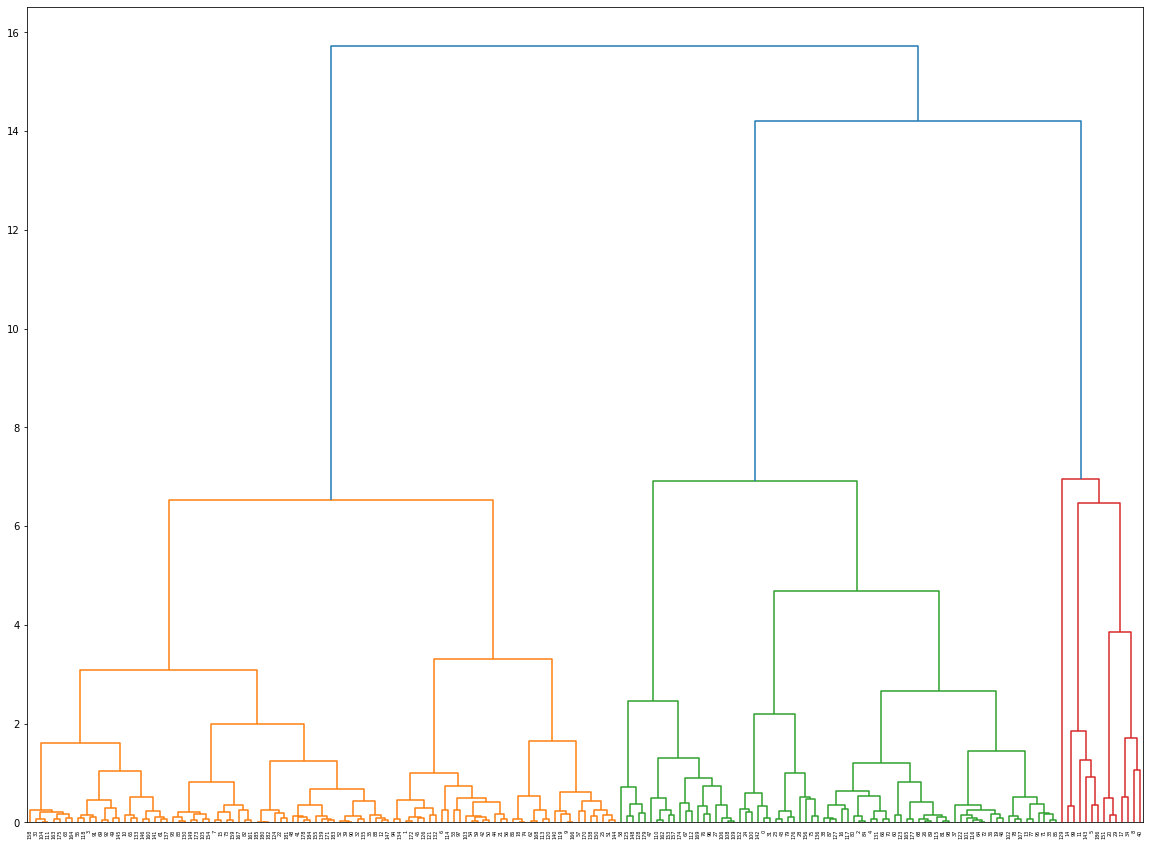

In [21]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))
# All methods namely Elbow Method and Hierarchical Clustering shows K=3 will correct number of clusters.

In [22]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=3, random_state=6)

In [23]:
countrywise["Clusters"]=clf_final.predict(X)

In [24]:
# Summary of Clusters
cluster_summary=pd.concat([countrywise[countrywise["Clusters"]==1].head(15),countrywise[countrywise["Clusters"]==2].head(15),countrywise[countrywise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery,Active Cases,Outcome Cases,Clusters
Country/Region,,,,,,,,
US,4290259.00,1325804.00,148011.00,3.45,30.90,2816444.00,1473815.00,1.00
Colombia,257101.00,131161.00,8777.00,3.41,51.02,117163.00,139938.00,1.00
Bangladesh,226225.00,125683.00,2965.00,1.31,55.56,97577.00,128648.00,1.00
Argentina,167416.00,72575.00,3059.00,1.83,43.35,91782.00,75634.00,1.00
Canada,116458.00,0.00,8944.00,7.68,0.00,107514.00,8944.00,1.00
Indonesia,100303.00,58173.00,4838.00,4.82,58.00,37292.00,63011.00,1.00
Egypt,92482.00,34838.00,4652.00,5.03,37.67,52992.00,39490.00,1.00
Philippines,82040.00,26446.00,1945.00,2.37,32.24,53649.00,28391.00,1.00
Ecuador,81161.00,34896.00,5532.00,6.82,43.00,40733.00,40428.00,1.00


In [25]:
print("Avergae Mortality Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Recovery"].mean())

Avergae Mortality Rate of Cluster 0:  2.2149254363429627
Avergae Recovery Rate of Cluster 0:  81.25850156869187
Avergae Mortality Rate of Cluster 1:  2.707583315663142
Avergae Recovery Rate of Cluster 1:  35.55738862965622
Avergae Mortality Rate of Cluster 2:  14.301099512835453
Avergae Recovery Rate of Cluster 2:  48.07149792571852


In [26]:
print("Few Countries belonging to Cluster 0: ",list(countrywise[countrywise["Clusters"]==0].head(10).index))
print("Few Countries belonging to Cluster 1: ",list(countrywise[countrywise["Clusters"]==1].head(10).index))
print("Few Countries belonging to Cluster 2: ",list(countrywise[countrywise["Clusters"]==2].head(10).index))

Few Countries belonging to Cluster 0:  ['Brazil', 'India', 'Russia', 'South Africa', 'Peru', 'Chile', 'Iran', 'Pakistan', 'Saudi Arabia', 'Turkey']
Few Countries belonging to Cluster 1:  ['US', 'Colombia', 'Bangladesh', 'Argentina', 'Canada', 'Indonesia', 'Egypt', 'Philippines', 'Ecuador', 'Sweden']
Few Countries belonging to Cluster 2:  ['Mexico', 'United Kingdom', 'Spain', 'Italy', 'France', 'Belgium', 'Netherlands', 'Hungary', 'Yemen', 'Western Sahara']
